# DSCI 619 Deep Learning
# Week 5: Build Recurrent Neural Network (RNN) Models

http://d2l.ai/chapter_recurrent-neural-networks/index.html

We have covered how to perform regression and classification using neural networks on the tabular data, such as the Excel workbook and images. There is a key assumption in these data. They are independent. For example, the 10th observation is independent of the 100th observation. We use feedforward neural networks to model them.

There are problems that the independence assumption is not valid anymore. For example, we want to forecast the missing word for the following sentence: 

It is raining now. Please bring your $\underline{\ \ \ \ \ \ \  }$.

By common sense, the missing word probably is "umbrella" since it depends on the context (Previous words). Therefore, we need another type of neural network that has a backward connection between hidden layers. Then, they can have some memory in them to model the dependence in the data. These neural networks are called Recurrent Neural Networks (RNN). We can use RNN models for text data and speech data. 

Typically RNN model has the following network architecture: 

<img src ="RNN1.jpg">

Source: https://en.wikipedia.org/wiki/Recurrent_neural_network

Note here:

+ $x_t$ denotes the input vector, which depends on time t.
+ $h_t$ is the hidden layer vector, which can memorize some historical data.
+ $o_t$ is the output vector.

We use the default Relu (https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) activation function a lot before. When we perform classification, we use sigmoid (https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) for binary classification and softmax(https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax) for multiple 
classification.

In RNN, we use the following three functions: Relu, sigmoid and Hyperbolic tangent function(https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh).

The RNN is trained by backpropagation through time. Then the RNN is unfolded into a forward feed net with multiple layers. When the gradient is passed back through many time steps, it tends to grow or vanish because the gradients are multiplied many times. It is called the exploding and vanishing gradients problem. ( https://en.wikipedia.org/wiki/Vanishing_gradient_problem).   Hochreiter & Schmidhuber proposed the Long Short-Term Memory (LSTM) to address it in 2009. 



## Long Short-Term Memory (LSTM)


A multi-layer long short-term memory (LSTM) RNN can be applied to an input sequence. LSTM has three gates that are input, output, and forget gates.

For each element in the input sequence, each layer computes the following function:

$$i_t =\sigma( W_{ii}x_t+b_{ii}+W_{hi}h_{t-1}+b_{hi})$$
$$f_t =\sigma (W_{if}x_t+b_{if}+W_{hf}h){t-1}+b_{hf})$$
$$g_t =\tanh(W_{ig}x_t+b_{ig}+W_{hg}h_{t-1}+b_{hg})$$
$$o_t =\sigma (W_{io}x_t+b_{io}+W_{ho}h){t-1}+b_{ho})$$
$$c_t=f_t \circ c_{t-1}+i_t \circ g_t$$
$$h_t=o_t\circ\tanh(c_t)$$

Where:

+ $h_t$ is the hidden state at time $t$
+ $c_t$ is the cell state at time $t$
+ $i_t$ is the input gate
+ $f_t$ is the forget gate
+ $g_t$ is the cell 
+ $o_t$ is the ouput gate
+ $\circ$ is the Hadamard product
+$\sigma$ is the sigmoid funciton.

<center> source: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html </center>

By the equations above, **LSTM will generate three values (output, hidden, and cell)**. LSTMs are used in modeling tasks related to sequences. They can perform predictions based on its history. We often use LSTMs in NLP, such as machine translation and sentiment classifications. 

## Gated Recurrent Unit (GRU)

LSTM has many parameters to estimate. Kyunghyun Cho et al. introduced the gated recurrent unit(GRU) (https://en.wikipedia.org/wiki/Gated_recurrent_unit) in 2014. GRUs have few parameters than LSTMs.

For each element in the input sequence, each layer computes the following function:

$$r_t=\sigma(W_{ir}x_t+b_{ir}+W_{hr}h_{(t-1)}+b_{hr})$$
$$z_t=\sigma(W_{iz}x_t+b_{iz}+W_{hz}h_{(t-1)}+b_{hz})$$
$$n_t=\tanh(W_{in}x_t+b_{in}+r_t*(W_{hn}h_{(t-1)}+b_{hn}))$$
$$h_t=(1-z_t)*n_t+z_t*h_{(t-1)}$$

where
+ $h_t$ is the hidden state at time $t$
+ $x_t$ is the input at time $t$
+ $h_{(t-1)}$ is the hidden state of the layer at time $t-1$
+ $r_t$ is the reset gate
+ $z_t$ is the update gate
+ $n_t$ is the new gate

<center> source: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html?highlight=gru#torch.nn.GRU </center>


Chung, Gulcehre, Cho and Bengio published a paper, "Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling".

In this paper we compare different types of recurrent units in recurrent neural networks (RNNs). Especially, we focus on more sophisticated units that implement a gating mechanism, such as a long short-term memory (LSTM) unit and a recently proposed gated recurrent unit (GRU). We evaluate these recurrent units on the tasks of polyphonic music modeling and speech signal modeling. Our experiments revealed that these advanced recurrent units are indeed better than more traditional recurrent units such as tanh units. Also, we found GRU to be comparable to LSTM.

<center> source https://arxiv.org/pdf/1412.3555.pdf  </center>

# Project of Text Classification Using PyTorch


Let’s look at a real-world project of text classification using TensorFlow. We will cover how to perform text classification using RNN. (see https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html). We work on the large movie review dataset ( see http://ai.stanford.edu/~amaas/data/sentiment/). It is a binary sentiment classification with 50,000 movie reviews. This dataset has the following two columns:

+ **review**: Text
+ **sentiment**: positive or negative 

Our goal is to forecast the **sentiment** based on the **review**. 

## Load and Clean the Data

First, we load all the libraries for this sentiment analysis. 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import re
import spacy

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

Next, let's load the data into memory

In [2]:
review_file_path ='C:\\Users\\liuyu\\OneDrive\\OneDrive - Maryville University\\DSCI 619\\Modules\\WK5\\IMDB Dataset.csv'
reviews = pd.read_csv(review_file_path)
print(reviews.shape)
reviews.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Next, let's count the number of words in each review by adding one more feature in this data frame.

In [3]:
reviews['review_length']  = [len(x.split()) for x in reviews['review'].tolist()]
reviews.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


We need to convert the label of sentiment to a numerical value using label encoding.

In [4]:
# Label encode the target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
reviews['sentiment'] = le.fit_transform(reviews['sentiment'])
reviews.sentiment.value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

It is a balanced binary classification with 50% positive cases and 50% negative cases.

Next, we need to clean the texts. We use the regular expressions (see https://docs.python.org/3/library/re.html). It is a powerful tool for us to clean texts using very compact codes. We perform the following tasks to clean the texts:

+ Remove all special characters, punctuation and spaces
+ Remove special characters, <br />
+ Remove all words with length <=2
+ Tokenizes the text, i.e. segments it into words using Spacy

We need to **install Spacy** library. To install spaCy, we need to follow the official instructions at spaCy( https://spacy.io/usage#installation)

1.	Type Anaconda Prompt in the search box at the left corner of windows and click Anaconda Prompt.
2.	Run the following command to install spaCy in the Anaconda Prompt

   **conda install -c conda-forge spacy**
3.	Run the following command to install the spaCy model in the Anaconda Prompt

   **python -m spacy download en_core_web_sm**   

In [5]:
#tokenization
import spacy
import en_core_web_sm 
# Load the pretrained statistical models for English
nlp = en_core_web_sm.load()

def clean_text (text):
    # Remove all special characters, punctuation and spaces
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)
    # Replace special characters,<br />,  in the file
    text = re.sub(r"<br />", " ", text)
    # Remove length <=2
    text = re.sub(r'\b[a-zA-Z]{1,2}\b', '', text)
    # Tokenizes the text, i.e. segments it into words
    return [token.text for token in nlp.tokenizer(text) if not token.is_stop]

Next, we construct a counter to count the occurrences of each word/token.

In [6]:
# Count number of occurences of each word
Vocab_counts = Counter()
for index, row in reviews.iterrows():
    Vocab_counts.update(clean_text(row['review']))

In [7]:
Vocab_counts.most_common(10)

[(' ', 1806613),
 ('  ', 378357),
 ('movie', 86609),
 ('film', 78691),
 ('   ', 65038),
 ('like', 38649),
 ('good', 28531),
 ('time', 24547),
 ('story', 22377),
 ('bad', 17444)]

There are more than 127K unique words. We only keep the words occurring more than four times in the reviews.

In [8]:

print(f"There are {len(Vocab_counts.keys())} unique words!")
for word in list(Vocab_counts):
    if Vocab_counts[word] <=4:
        del Vocab_counts[word]
print(f"There are {len(Vocab_counts.keys())} unique words with length>4!")

There are 127443 unique words!
There are 45734 unique words with length>4!




We need to map the words/tokens to numerical values. We create a simple word to index mapping.

In [9]:

# Creating vocabulary mapping
# Initialize it with empty and unkown words
vocab2index = {"":0, "UNK":1}
vocabs = ["", "UNK"]
for word in Vocab_counts:
    vocab2index[word] = len(vocabs)
    vocabs.append(word)


The following codes convert each review to a tuple of word2index and the corresponding length.

In [10]:
def integer_encode_sentence(text, vocab2index, N= 100):
    tokens = clean_text(text)
    integer_encode = np.zeros(N, dtype=int)
    #Return UNK if the specified key does not exist.
    encoded_sent = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokens])
    length = min(N, len(encoded_sent))
    integer_encode[:length] = encoded_sent[:length]
    return integer_encode, length

Next, we convert all reviews to the numerical indices.

In [11]:
reviews['integer_encode'] = reviews['review'].apply(lambda x: np.array(integer_encode_sentence(x,vocab2index ), dtype=object))

In [12]:
reviews.head()

,review,sentiment,review_length,integer_encode
0,One of the other reviewers has mentioned that ...,1,307,"[[2, 3, 4, 5, 6, 2, 7, 8, 9, 10, 2, 2, 11, 12,..."
1,A wonderful little production. <br /><br />The...,1,162,"[[2, 125, 126, 127, 8, 128, 129, 2, 130, 131, ..."
2,I thought this was a wonderful way to spend ti...,1,166,"[[2, 188, 2, 125, 189, 2, 190, 132, 8, 191, 19..."
3,Basically there's a family where a little boy ...,0,138,"[[249, 8, 250, 2, 126, 251, 252, 253, 8, 254, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,"[[1, 290, 2, 291, 2, 292, 2, 293, 8, 294, 295,..."


We mapped review text into an array containing the following two items:

+ First item is an array containing the corresponding word index for all words/tokens.
+ Second item is a scalar storing the length of the review text.

In [13]:
reviews['integer_encode'][0]

array([array([ 2,  3,  4,  5,  6,  2,  7,  8,  9, 10,  2,  2, 11, 12, 13, 14, 15,
        2,  2, 16, 17, 18,  2, 19, 20,  2, 10, 21,  2, 22,  2,  2,  2, 23,
       24,  2, 25, 26,  2, 27, 28,  2, 29, 30,  2, 19,  2, 31,  2, 32, 33,
        2, 21, 34, 35,  8,  2, 36, 37,  2, 38, 39, 40, 41,  1,  2, 42, 43,
        2, 44, 45,  2, 46, 47,  2, 48, 49, 50, 51, 52,  1,  2, 53,  2, 54,
        2, 55,  2, 45,  2, 56,  2, 57, 58,  1, 59, 60, 61, 62,  2]),
       100], dtype=object)

## Split the Data into Training and Test Data 

We take out the features in the integer_encode column and label in the sentiment column. 

In [16]:
X = list(reviews['integer_encode'])
y = list(reviews['sentiment'])


We perform the stratified train/test split using scikit-learn. 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state =1001)

## Write Custom Datasets

torch.utils.data.Dataset is an abstract class representing a dataset. We derive a child class based on  the build-in Dataset class in PyTorch by overriding the following three-member functions:

+ Constructor: **__init__** initialize the features and label
+ Size of the input data: **__len__**
+ Return the data and label at a given index : **__getitem__**

In [22]:
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  Dataset(*args, **kwds)
 |  
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Method resolution order:
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined 

In [18]:
class ReviewsDataset(Dataset):
    # Initialize the dataset
    def __init__(self, X, y):
        self.X = X
        self.y = y
    # Get the length/number of observations    
    def __len__(self):
        return len(self.y)
    # Return the features, label and the length of the review
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

Next, we create the training and test datasets based on the custom Dataset by providing the features and label.

In [20]:
train_data = ReviewsDataset(X_train, y_train)
test_data = ReviewsDataset(X_test, y_test)

Next, we can call the DataLoader that supports automatic batching and single and multiprocess data loading and automatic memory pining, etc.

https://pytorch.org/docs/stable/data.html

In [26]:
help(torch.utils.data.DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Itera

## Define the LSTM model


Our network has several layers:
+ The first layer is the embedding layer which converts words to a vector by keeping their "meaning". Similar words, such as cats and dogs, are close to each other. Please see https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html
+ The second layer is the LSTM to capture the "context" of the words/tokens (see https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html?highlight=lstm#torch.nn.LSTM)
+ The last layer is a classifier with two neurons for binary classification with two cases. 

In [27]:
class RNN_LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        # Embedding layer: specify the size of the dictionary, the size of the each embedding layer, and pads zero
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        # LSTM: Specify the input_size = the out size of the Embedding layer
        # LSTM: Specify the number of feautres in the hidden state h
        # LSTM: Specify the bactch_first = True: then the input and output tensors are provided as batch
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        # Classifier for binary classification using two neurons
        self.linear = nn.Linear(hidden_dim, 2)
        # Drop out layer
        self.dropout = nn.Dropout(0.3)
    
    # Forward propagation in neural networks     
    def forward(self, x, l): # inputs are features: x,  and length of the review: l
        
        # Perform embedding
        x = self.embedding(x)
        # perform droput
        x = self.dropout(x)
        #https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch
        x_pack = pack_padded_sequence(x, l, batch_first=True, enforce_sorted=False)
        # Run the LSTM on the x_pack
        out_pack, (ht, ct) = self.lstm(x_pack)
        # Perform linear operator at the latest item on the hidden state
        out = self.linear(ht[-1])
        return out

# Define the Training and Validation Modules

We define two functions of training and validation. These functions help us store the loss, accuracy for both the training dataset and validation dataset. 

In [28]:
def train_model(model, epochs=10, lr=0.001):
    # Initialize the data frame to store the training and validation loss and accuracy
    data = np.full((epochs, 5), -1)
    history = pd.DataFrame(data, columns=['epoch', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])
   
    # Filter out all the parameters that require gradients
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    # Setup the Adam algorithm
    optimizer = torch.optim.Adam(parameters, lr=lr)
    # Loop over the epochs
    for i in range(epochs):
        # Sets the module in training mode
        model.train()
        # Initialize the total loss for all observations
        sum_loss = 0.0
        # Initialize the the number of casese that the model correctly predicts
        correct = 0.0
        # Initialize the total observations
        total = 0
        # Loop over each batch by using train_dataloader
        # Each batch contains the features:x, label:y, and, the length of the review texts
        for x, y, length in train_dataloader:
            x = x.long()
            y = y.long()
            # Predict the labels using features and length
            y_pred = model(x, length)
            # Set the gradients to zero before starting to do backpropragation
            # because PyTorch accumulates the gradients on subsequent backward passes. 
            optimizer.zero_grad()
            # Compute the loss
            loss = F.cross_entropy(y_pred, y)
            # Compute gradient of loss w.r.t all the parameters in loss that have requires_grad = True 
            # and store them in parameter.grad attribute for every parameter.
            loss.backward()
            # Updates all the parameters based on parameter.grad
            optimizer.step()
            # Predict the label
            pred = torch.max(y_pred, 1)[1]
            # Update correctly predicted classes
            correct += (pred == y).float().sum()
            # Update the sum of the loss
            sum_loss += loss.item()*y.shape[0]
            # Update the total observations
            total += y.shape[0]
        # Compute the validation loss and validation accuracy using test dataset
        val_loss, val_acc = validation_metrics(model, test_dataloader)
        # Print out the losses and accuracies
        print(f"epoch {i+1}/{epochs} - loss: {sum_loss/total:.4f} - accuracy: {correct/total:.4f} - val_loss: {val_loss:.4f}, val_accuracy {val_acc:.4f}")
        # Store the losses and accuracies
        history.loc[history.index[i], 'epoch'] = i
        history.loc[history.index[i], 'loss'] = sum_loss/total
        c=correct/total
        history.loc[history.index[i], 'accuracy'] = c.numpy()
        history.loc[history.index[i], 'val_loss'] = val_loss
        history.loc[history.index[i], 'val_accuracy'] = val_acc.numpy()        
    return(history)

# Compute the validation loss and accuracy
def validation_metrics (model, test_dataloader):
    # Sets the module in evaluation mode
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0

    # Loop over each batch by using train_dataloader
    # Each batch contains the features:x, label:y, and, the length of the review texts
    for x, y, length in test_dataloader:
        x = x.long()
        y = y.long()
        # Predict the labels
        y_hat = model(x, length)
        # Compute the losses
        loss = F.cross_entropy(y_hat, y)
        # Find the predicted label
        pred = torch.max(y_hat, 1)[1]
        # Update correctly predicted classes
        correct += (pred == y).float().sum()
        # Update the total observations
        total += y.shape[0]
        # Update the sum of the loss
        sum_loss += loss.item()*y.shape[0]
    # Return the average loss and accuracy
    return sum_loss/total, correct/total

Next, We initialize the LSTM model

In [29]:
model_LSTM = RNN_LSTM(vocab_size, 64, 64)

We train the model

In [30]:
%%time
history = train_model(model_LSTM, epochs=15, lr=0.001)

epoch 1/15 - loss: 0.6950 - accuracy: 0.5076 - val_loss: 0.6914, val_accuracy 0.5226
epoch 2/15 - loss: 0.6884 - accuracy: 0.5375 - val_loss: 0.6864, val_accuracy 0.5386
epoch 3/15 - loss: 0.6817 - accuracy: 0.5603 - val_loss: 0.6754, val_accuracy 0.5755
epoch 4/15 - loss: 0.6640 - accuracy: 0.5950 - val_loss: 0.6309, val_accuracy 0.6616
epoch 5/15 - loss: 0.6084 - accuracy: 0.6716 - val_loss: 0.6169, val_accuracy 0.7014
epoch 6/15 - loss: 0.5582 - accuracy: 0.7192 - val_loss: 0.6138, val_accuracy 0.7280
epoch 7/15 - loss: 0.5149 - accuracy: 0.7513 - val_loss: 0.5934, val_accuracy 0.7510
epoch 8/15 - loss: 0.4750 - accuracy: 0.7767 - val_loss: 0.7129, val_accuracy 0.7512
epoch 9/15 - loss: 0.4467 - accuracy: 0.7963 - val_loss: 0.7148, val_accuracy 0.7664
epoch 10/15 - loss: 0.4272 - accuracy: 0.8065 - val_loss: 0.7409, val_accuracy 0.7563
epoch 11/15 - loss: 0.4079 - accuracy: 0.8185 - val_loss: 0.8039, val_accuracy 0.7632
epoch 12/15 - loss: 0.3889 - accuracy: 0.8301 - val_loss: 0.665

## Model Diagnostics of LSTM

We check our model by plotting the losses and accuracies.


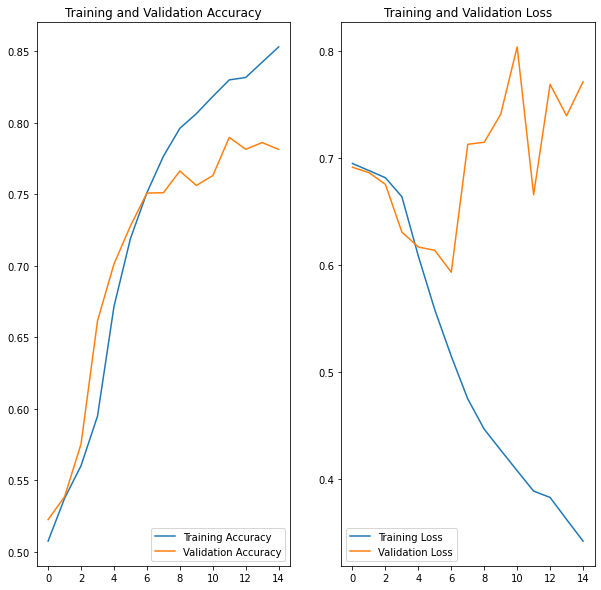

In [31]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

epochs = history['epoch']

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

## GRU Model
We build a GRU model using nn.GRU() function. This model is very similar to LSTM function.

In [33]:

class RNN_GRU(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.gru = nn.GRU(hidden_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, 2)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x, l):
        x = self.embedding(x)
        x = self.dropout(x)
        #https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch
        x_pack = pack_padded_sequence(x, l, batch_first=True, enforce_sorted=False)
        packed_output, ht = self.gru(x_pack)
        # unpack the output from GRU
        output, input_sizes = pad_packed_sequence(packed_output, batch_first=True)
        y = output[:, -1, :]

        out = self.linear(y)
        return out

Create the GRU model

In [34]:
model_GRU = RNN_GRU(vocab_size, 64, 64)

We train our GRU model

In [36]:
%%time
history = train_model(model_GRU, epochs=15, lr=0.001)

epoch 1/15 - loss: 0.6983 - accuracy: 0.5001 - val_loss: 0.6961, val_accuracy 0.5045
epoch 2/15 - loss: 0.6932 - accuracy: 0.5078 - val_loss: 0.6937, val_accuracy 0.5042
epoch 3/15 - loss: 0.6910 - accuracy: 0.5173 - val_loss: 0.6929, val_accuracy 0.5090
epoch 4/15 - loss: 0.6889 - accuracy: 0.5252 - val_loss: 0.6926, val_accuracy 0.5109
epoch 5/15 - loss: 0.6875 - accuracy: 0.5292 - val_loss: 0.6914, val_accuracy 0.5138
epoch 6/15 - loss: 0.6829 - accuracy: 0.5405 - val_loss: 0.6877, val_accuracy 0.5303
epoch 7/15 - loss: 0.6732 - accuracy: 0.5588 - val_loss: 0.6954, val_accuracy 0.5717
epoch 8/15 - loss: 0.6447 - accuracy: 0.5974 - val_loss: 0.6691, val_accuracy 0.5924
epoch 9/15 - loss: 0.6189 - accuracy: 0.6244 - val_loss: 0.6623, val_accuracy 0.6158
epoch 10/15 - loss: 0.5967 - accuracy: 0.6424 - val_loss: 0.6293, val_accuracy 0.6319
epoch 11/15 - loss: 0.5763 - accuracy: 0.6566 - val_loss: 0.6451, val_accuracy 0.6401
epoch 12/15 - loss: 0.5604 - accuracy: 0.6668 - val_loss: 0.671

## Model Diagnostics of GRU

We check our model by plotting the losses and accuracies.

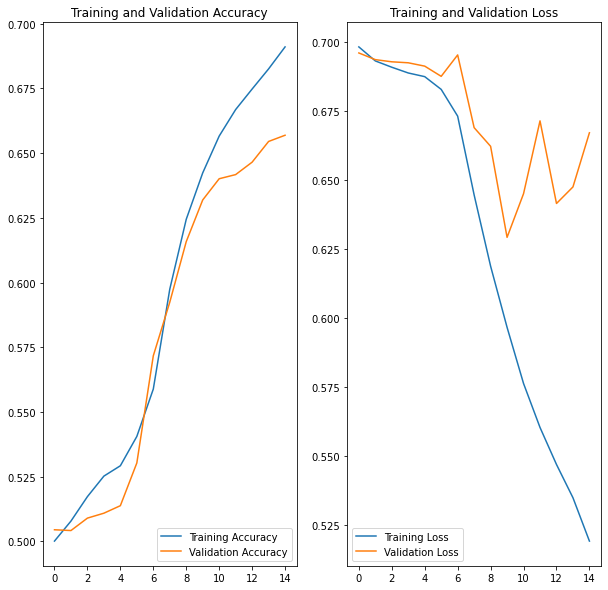

In [37]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

epochs = history['epoch']

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

## LSTM and GRU Model

We perform sentiment analysi using both LSTM and GRU models.

In [38]:
class RNN_LSTM_GRU(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.gru = nn.GRU(hidden_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, 2)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x, l):
        x = self.embedding(x)
        x = self.dropout(x)
        #https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch
        x_pack = pack_padded_sequence(x, l, batch_first=True, enforce_sorted=False)
        out_pack, (ht, ct) = self.lstm(x_pack)
        packed_output, ht = self.gru(out_pack)
        # unpack the output from GRU
        output, input_sizes = pad_packed_sequence(packed_output, batch_first=True)
        # Map 3D to 2D, then it can be passed into a classifier
        y = output[:, -1, :]
        out = self.linear(y)
        return out

We creat a LSTM and GRU model.

In [39]:
model_LSTM_GRU = RNN_LSTM_GRU(vocab_size, 64, 64)

Next, We train the model.

In [40]:
%%time
history = train_model(model_LSTM_GRU, epochs=15, lr=0.001)

epoch 1/15 - loss: 0.6930 - accuracy: 0.5100 - val_loss: 0.6928, val_accuracy 0.5082
epoch 2/15 - loss: 0.6914 - accuracy: 0.5231 - val_loss: 0.6915, val_accuracy 0.5161
epoch 3/15 - loss: 0.6878 - accuracy: 0.5347 - val_loss: 0.6865, val_accuracy 0.5324
epoch 4/15 - loss: 0.6689 - accuracy: 0.5695 - val_loss: 0.6497, val_accuracy 0.5948
epoch 5/15 - loss: 0.6418 - accuracy: 0.6027 - val_loss: 0.6292, val_accuracy 0.6141
epoch 6/15 - loss: 0.6178 - accuracy: 0.6254 - val_loss: 0.6174, val_accuracy 0.6228
epoch 7/15 - loss: 0.6012 - accuracy: 0.6381 - val_loss: 0.5973, val_accuracy 0.6405
epoch 8/15 - loss: 0.5761 - accuracy: 0.6549 - val_loss: 0.5894, val_accuracy 0.6484
epoch 9/15 - loss: 0.5573 - accuracy: 0.6683 - val_loss: 0.5804, val_accuracy 0.6563
epoch 10/15 - loss: 0.5439 - accuracy: 0.6766 - val_loss: 0.5698, val_accuracy 0.6595
epoch 11/15 - loss: 0.5334 - accuracy: 0.6824 - val_loss: 0.5713, val_accuracy 0.6609
epoch 12/15 - loss: 0.5216 - accuracy: 0.6890 - val_loss: 0.565

## Model Diagnostics of LSTM and GRU

We check our model by plotting the losses and accuracies.

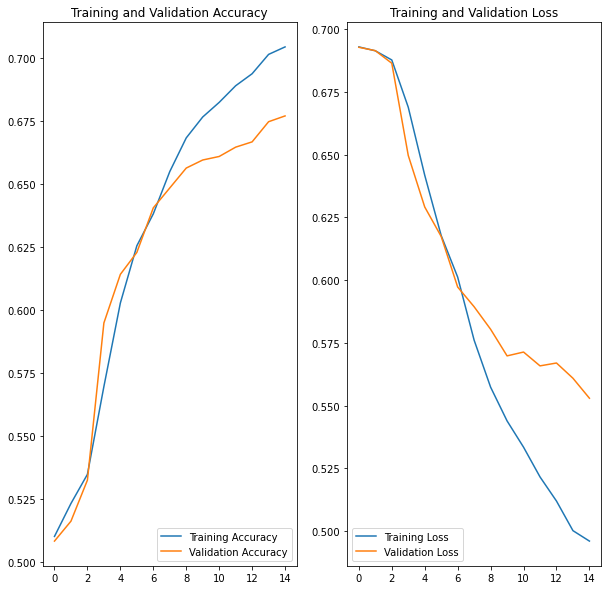

In [41]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

epochs = history['epoch']

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

# Summary

+ We can use regular expressions to clean texts.
+ Recurrent Neural Networks (RNN) are powerful tools to model sequential data such as texts and voices
+ We use text vectorization to convert words to indices.
+ We can convert word indices to dense vectors using embedding layers
+ LSTM and GRU can deal with the vanishing gradient problems.
+ We perform the text sentiment analysis using LSTM model.
+ We apply GRU model to perform text classification.
+ We learn how to evaluate the RNN models. 
